<p>Name:- Krishna Mundada<p>
<p>Roll No:- 45 </p>
<p>Batch:- E3</p>
<hr>
<hr>
<p> Write a program to implement
<ol>
<li>Vanilla gradient descent. </li>
<li>Momentum based gradient descent.</li>
</ol>
Consider two points - (2, 0.3), (6, 0.8) approximate these two points by using above mention algorithm, also plot approx. curve.</p>
<hr>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
class GradientDescentFamily:
    w = 0.0
    b = 0.0
    velocity = 0.0
    X = np.array([])
    Y = np.array([])
    lr = 0.0
    gamma = 0.0

    N = 0

    def __init__(self, w, b, lr, gamma):
        self.w = w
        self.b = b
        self.lr = lr
        self.gamma = gamma
        self.X = np.array([2, 6])
        self.Y = np.array([0.3, 0.8])

        self.N = self.X.shape[0]

    def Get_Gradient(self):
        dldw = 0.0
        dldb = 0.0
        dldw += -2 * self.X * (self.Y - (self.w * self.X + self.b))
        dldb += -2 * (self.Y - (self.w * self.X + self.b))

        return dldw, dldb

    def Vanilla_Gradient_Descent(self):
        loss = 0.0
        self.w = 0.0
        self.b = 0.0
        for epoch in range(300):
            dldw, dldb = self.Get_Gradient()
            self.w -= self.lr * np.sum(dldw) / self.N
            self.b -= self.lr * np.sum(dldb) / self.N
            y_pred = self.w * self.X + self.b
            loss = np.sum((self.Y - y_pred) ** 2) / self.N
            plt.scatter(epoch, self.w, color='b')
            plt.scatter(epoch, self.b, color='r')
            plt.plot(epoch, loss, color='g')
        plt.show()
        print(f'w: {self.w}, b : {self.b}, final loss : {loss}')


    def Momentum_Gradient_Descent(self):
        dldw, dldb = self.Get_Gradient()
        self.w = 0.0
        self.b = 0.0
        loss = 0.0
        for epoch in range(300):
            dldw, dldb = self.Get_Gradient()
            self.velocity = self.gamma * self.velocity + self.lr * np.sum(dldw) / self.N
            self.w -= self.velocity
            self.b -= self.lr * np.sum(dldb) / self.N
            y_pred = self.w * self.X + self.b
            loss = np.sum((self.Y - y_pred) ** 2) / self.N
            plt.scatter(epoch, self.w, color='b')
            plt.scatter(epoch, self.b, color='r')
            plt.plot(epoch, loss, color='g')
        plt.show()
        print(f'w: {self.w}, b : {self.b}, final loss : {loss}')

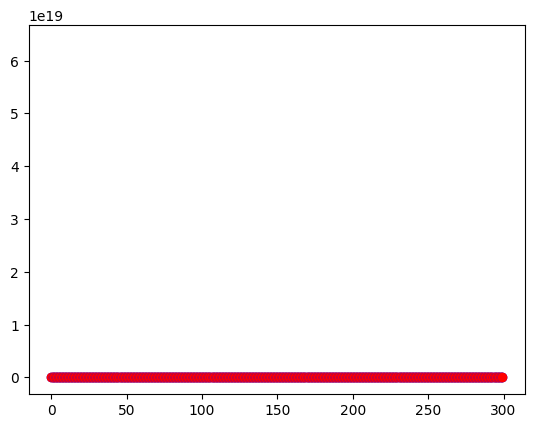

w: -1714128866.452568, b : -346152924.84059626, final loss : 6.36313830385421e+19


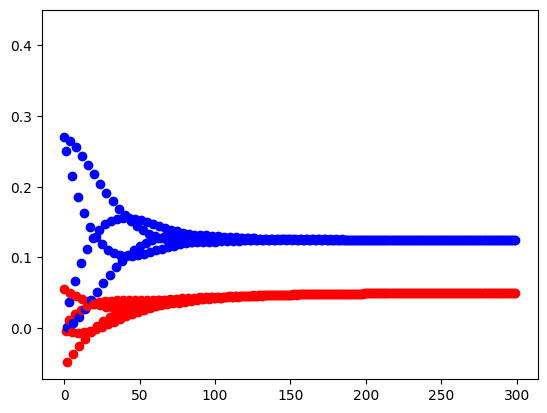

w: 0.12502196815756728, b : 0.049881645890758025, final loss : 2.8595203479731244e-09


In [28]:
if __name__ == '__main__':
    gd: GradientDescentFamily = GradientDescentFamily(0.0, 0.0, 0.05, 1.009)

    gd.Vanilla_Gradient_Descent()
    gd.Momentum_Gradient_Descent()